# LATAR BELAKANG MASALAH
Sebuah perusahaan digital marketing yang disewa jasanya oleh seorang *content creator* di US (United States) yang sedang merintis karirnya sebagai seorang youtuber, ingin merekrut tim data scientist. Perusahaan digital marketing ini sudah banyak membantu para inluencer atau youtuber dalam menentukan membuat sebuah konten yang bisa menaikkan traffic views dan like dari channel youtube. Sudah banyak konten yang dibuat oleh youtuber tersebut tetapi traffic views dan like-nya masih juga stagnan tidak ada kenaikan yang signifikan selama beberapa bulan terakhir ini.

# RUMUSAN MASALAH
Perusahaan digital marketing yang disewa jasa nya oleh seorang *content creator* ingin mengetahui analisa **Faktor apa saja yang mempengaruhi seberapa populer content yg diposting ke platform youtube**, informasi ini akan membantu perusahaan digital marketing untuk menentukan prediksi content apa yang harus dibuat oleh seorang youtuber untuk menaikkan traffic views dan like lewat platform youtube.

Sebagai seorang *Data Analyst*, kita akan mencoba menjawab pertanyaan dari masalah ini:

**"Apakah content video yang dibuat mempengaruhi faktor meningkatnya views dan like dari seorang content creator?"**

# PENGAMBILAN DATA 
Untuk menjawab pertanyaan di atas, kita akan menganalisa data *youtube creator* yang sudah dikumpulkan oleh perusahaan digital marketing tersebut. Dataset dapat diakses [di sini](https://www.kaggle.com/datasets/datasnaek/youtube-new).

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import json

import matplotlib.pyplot as plt

from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

### Read Data
Data *youtube creator* yang diberikan oleh perusahaan digital marketing ini mempunyai 2 table yang berbeda dari 2 tipe extension data yang berbeda, yaitu CSV dan JSON. Kita akan mencoba melakukan pembacaan data tersebut dan memberikan detail informasi data tersebut. 

### .CSV FILE
Data yang kita ambil dari tipe data .csv ini berisi informasi terkait detail informasi data seorang youtube creator. Kolom channel_title, title, dan description diisi oleh youtube creator pada saat signup ke platform youtube.

Ada 16 kolom dari data USvideos.csv yang diberikan oleh perusahaan digital marketing :
- video_id : ID unik dari setiap youtube creator
- trending_date : Tanggal dimana content tersebut menjadi populer
- title : Nama judul content video yang dibuat
- channel_title : Nama channel dari seorang youtube creator
- category_id : ID unik dari kategori video yang dibuat
- publish_time : Tanggal dimana content video tersebut pertama kali diupload dan dipublish oleh seorang youtube creator
- tags : Nama tag untuk klasifikasi pencarian video
- views : Jumlah banyaknya penonton dari video 
- likes : Jumlah banyaknya penonton yang SUKA dengan video 
- dislikes : Jumlah banyakanya penonton yang TIDAK SUKA dengan video 
- comment_count : Jumlah banyaknya komentar dari video
- thumbnail_link : URL untuk tampilan depan video
- comments_disabled : Informasi tombol komentar di non-aktifkan ("True" jika tombol komentar di-nonaktifkan atau "False" jika tombol komentar di-aktifkan)
- rating_disabled : Informasi tombol rating di non-aktifkan ("True" jika tombol rating di-nonaktifkan atau "False" jika rating di-aktifkan)
- video_error_or_removed : Informasi video yang gagal upload atau video yang dihapus ("True" jika ADA video yang gagal upload atau dihapus atau "False" jika TIDAK ADA video yang gagal upload atau dihapus)
- description : Detail informasi dari video yang dipublish

Berikut ini 5 baris teratas dan terbawah dari dataset USvideos.csv :


In [3]:
# read data from .csv file

df = pd.read_csv('USvideos.csv')
display(df.head(), df.tail())

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...
40948,ooyjaVdt-jA,18.14.06,Official Call of Duty®: Black Ops 4 — Multipla...,Call of Duty,20,2018-05-17T17:09:38.000Z,"call of duty|""cod""|""activision""|""Black Ops 4""",10306119,357079,212976,144795,https://i.ytimg.com/vi/ooyjaVdt-jA/default.jpg,False,False,False,Call of Duty: Black Ops 4 Multiplayer raises t...


### .JSON FILE
Data yang kita ambil dari tipe data .json ini berisi informasi terkait detail informasi kategori ID. Data dari .json ini berbentuk list.

Didalam 1 list ada 3 Keys_value dan 3 SubKeys_value dalam keys "items" dari data US_category_id.json yang diberikan oleh perusahaan digital marketing :
- kind : Bentuk nama list
- etag : ID unik dari embed code sebuah nama tag
- items : Detail informasi kategory ID
- etag in items : ID unik dari embed code sebuah nama tag
- id in items : ID unik dari list kategori
- snippet : detail informasi dari setiap nomor ID unik kategori
- ChannelId in snippet : ID unik dari channel youtube creator
- tittle in snippet : Nama kategori dari setiap ID unik kategori
- assignable : Informasi apakah kategori bisa di assign ("True" jika kategoriID bisa assign kedalam channel title atau "False jika kategoriID TIDAK BISA assign kedalam channel title")

Berikut ini adalah list dari dataset US_category_id.json :

In [4]:
# read data from .json file

f = open('US_category_id.json')
df_json = json.load(f)
df_json

{'kind': 'youtube#videoCategoryListResponse',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJvJAAShlR6hM"',
 'items': [{'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
   'id': '1',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Film & Animation',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
   'id': '2',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Autos & Vehicles',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxbknKFVe5Lmg"',
   'id': '10',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Music',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/HwXKamM1Q20q9BN-oBJavSGkfDI"',
   'id': '15',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdnt

# DATA UNDERSTANDING AND CLEANSING

Sebelum tim data analis kami melakukan analisis data terhadap data yang sudah diberikan, kami perlu mendalami dan memahami dataset yang diberikan oleh tim digital marketing, dalam tahapan ***Data Understanding***. Proses ini dilakukan agar kami dapat mengetahui data anomali yang ada didalam dataset yang diberikan dan mungkin butuh ditangani dalam tahapan proses ***Data Cleaning***. Setiap penanganan data anomali yang dikerjakan, akan dijustifikasi langkah yang diambil, baik secara domain knowledge ataupun secara statistik.

Pertama, kita harus cek detail data seperti (tipe data, dan NULL data), karena untuk meminimalisir kesalahan dalam analisa data.

In [5]:
# cek detail informasi dari data
df.info()

# Seperti informasi yang kami dapatkan bahwa ada 40949 data dari 16 kolom yang ada
# Jika kita lihat kolom description jumlah datanya tidak sama dengan keseluruhan data,
# berarti menandakan data pada kolom description ada data NULL/NaN

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

In [6]:
# describe untuk melihat detail summary statistik setiap kolom

display(
    df.describe(),
    df.describe(include='object')
)

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


,video_id,trending_date,title,channel_title,publish_time,tags,thumbnail_link,description
count,40949,40949,40949,40949,40949,40949,40949,40379
unique,6351,205,6455,2207,6269,6055,6352,6901
top,j4KvrAUjn6c,17.14.11,WE MADE OUR MOM CRY...HER DREAM CAME TRUE!,ESPN,2018-05-18T14:00:04.000Z,[none],https://i.ytimg.com/vi/j4KvrAUjn6c/default.jpg,► Listen LIVE: http://power1051fm.com/\n► Face...
freq,30,200,30,203,50,1535,30,58


Seperti yang dilihat dari detail yang tim analisis keluarkan, kita bisa melihat bahwa :
- Dataset USvideos.csv mempunyai 16 kolom dan 40949 baris.
- Pada saat kita cek detail info dari dataset tersebut, dikolom ***description*** memiliki data kosong yang berisi NaN.
- Pada kolom video_id berisikan id unik dari tiap title, sehingga tidak relevan dalam analisis yang akan kami kerjakan dan kolom tersebut bisa dihilangkan saja.
- Pada kolom thumbnail_link berisikan URL untuk thumbnail dari tiap title, sehingga tidak relevan dalam analisis yang akan kami kerjakan dan kolom tersebut bisa dihilangkan saja.
- Pada kolom tags berisikan tag yang diberikan channel_title, sehingga tidak relevan dalam analisis yang akan kami kerjakan dan kolom tersebut bisa dihilangkan saja.
- Pada kolom publish_time terlihat untuk tanggal dan jam-nya digabung, disini kita akan memisahkan tanggal dan jam nya, dan mengganti data type dari jam menjadi datetime
- Pada kolom category_id, bisa dilihat tidak ada nama category_name nya dikarenakan nama kategorinya berada di dataset yang berbeda di US_category_id.json, maka untuk menganalisis setiap nama kategorinya kita harus menggabungkan kedalam tabel dataset USvideos.csv


## MENGGABUNGKAN TABEL DATASET

In [7]:
list_title=[]
list_id=[]

for i in df_json['items']:
    list_title.append(i['snippet']['title'])
    list_id.append(int(i['id']))

In [8]:
df_cat = pd.DataFrame({'category_name':list_title,'category_id':list_id})
df_cat.head()

,category_name,category_id
0,Film & Animation,1
1,Autos & Vehicles,2
2,Music,10
3,Pets & Animals,15
4,Sports,17


In [9]:
df = pd.merge(df, df_cat, on='category_id', how='left')
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,Entertainment
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment


In [10]:
col = df.pop('category_name')
df.insert(5, 'category_name', col)
df.head()

,video_id,trending_date,title,channel_title,category_id,category_name,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,People & Blogs,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,Entertainment,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,Comedy,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,Entertainment,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,Entertainment,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


## DROP COLUMN
tim analisis kami akan melakukan drop column pada kolom video_id, tags, dan thumbnail_link, dikarenakan data pada kolom tersebut tidak digunakan pada saat melakukan analisis. 

In [11]:
df.drop(['video_id', 'tags', 'thumbnail_link'], axis=1, inplace=True)

## FORMATING TIME AND DATE IN publish_time
tim analisis kami akan memisahkan tanggal dan jam publish untuk memudahkan tim kami menganalisis data

In [12]:
# Formating kolom trending_date menjadi datetime

df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m').dt.date

In [13]:
# Formating kolom publish_time menjadi datetime

publish_time = pd.to_datetime(df['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
df['publish_date'] = publish_time.dt.date
df['publish_time'] = publish_time.dt.time
df['publish_hour'] = publish_time.dt.hour

In [14]:
cold = df.pop('publish_date')
df.insert(6, 'publish_date', cold)
colh = df.pop('publish_hour')
df.insert(7,'publish_hour', colh)
df.head()

,trending_date,title,channel_title,category_id,category_name,publish_time,publish_date,publish_hour,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,People & Blogs,17:13:01,2017-11-13,17,748374,57527,2966,15954,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,Entertainment,07:30:00,2017-11-13,7,2418783,97185,6146,12703,False,False,False,"One year after the presidential election, John..."
2,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,Comedy,19:05:24,2017-11-12,19,3191434,146033,5339,8181,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,Entertainment,11:00:04,2017-11-13,11,343168,10172,666,2146,False,False,False,Today we find out if Link is a Nickelback amat...
4,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,Entertainment,18:01:41,2017-11-12,18,2095731,132235,1989,17518,False,False,False,I know it's been a while since we did this sho...


## MISSING VALUE
tim analisis kami akan melakukan cek missing value dan mengisi value yg NaN

In [15]:
display(df.isna().sum()/df.shape[0]*100)

trending_date             0.000000
title                     0.000000
channel_title             0.000000
category_id               0.000000
category_name             0.000000
publish_time              0.000000
publish_date              0.000000
publish_hour              0.000000
views                     0.000000
likes                     0.000000
dislikes                  0.000000
comment_count             0.000000
comments_disabled         0.000000
ratings_disabled          0.000000
video_error_or_removed    0.000000
description               1.391975
dtype: float64

Secara garis besar:  
* *missing value* di kolom `description` memiliki proporsi yang cukup rendah (1.3%) (<10%) 

Ada 2 cara untuk menangani *missing value*:
* pertama, menghapus baris/kolom yang berisi *missing value*.
* kedua, mengisi data yang hilang. Cara ini lebih disarankan. Ada beberapa metode yang bisa digunakan untuk mengisi missing value, cara yang paling baik adalah dengan mengisi data yang hilang dengan nilai sebenarnya, atau sedekat mungkin dengan nilai asli. Dalam kasus ini, kita akan mencoba mengisi *missing value* berdasarkan kolom lain yang secara domain knowledge atau secara statistik berkaitan dengan kolom yang memiliki *missing value*.

In [16]:
df[df['description'].isna()]['category_id'].value_counts()

22    149
24    145
25     78
17     49
28     40
10     35
23     22
27     14
20     14
26      6
2       5
1       5
15      4
29      4
Name: category_id, dtype: int64

Bisa kita lihat dari data yang kita munculkan berikut ini, bahwa kita bisa mengisi value dari description berdasarkan category_id dan mengisi value yang NaN dengan category_name, mari kita isi data dari description yang Nan.

In [17]:
# mengisi value pada kolom description dengan detail dari category name

df.loc[(df['description'].isna()) & (df['category_id']==22),['description']] = 'People & Blogs'
df.loc[(df['description'].isna()) & (df['category_id']==24),['description']] = 'Entertainment'
df.loc[(df['description'].isna()) & (df['category_id']==25),['description']] = 'News & Politics'
df.loc[(df['description'].isna()) & (df['category_id']==17),['description']] = 'Sports'
df.loc[(df['description'].isna()) & (df['category_id']==28),['description']] = 'Science & Technology'
df.loc[(df['description'].isna()) & (df['category_id']==10),['description']] = 'Music'
df.loc[(df['description'].isna()) & (df['category_id']==23),['description']] = 'Comedy'
df.loc[(df['description'].isna()) & (df['category_id']==27),['description']] = 'Education'
df.loc[(df['description'].isna()) & (df['category_id']==20),['description']] = 'Gaming'
df.loc[(df['description'].isna()) & (df['category_id']==26),['description']] = 'Howto & Style'
df.loc[(df['description'].isna()) & (df['category_id']==2),['description']] = 'Autos & Vehicles'
df.loc[(df['description'].isna()) & (df['category_id']==1),['description']] = 'Film & Animation'
df.loc[(df['description'].isna()) & (df['category_id']==15),['description']] = 'Pets & Animals'
df.loc[(df['description'].isna()) & (df['category_id']==29),['description']] = 'Nonprofits & Activism'


### DATA YANG SUDAH BERSIH
Sekarang data sudah terisi semua, untuk persiapan data yang akan dianalisis oleh tim data analis kami sudah siap.

In [18]:
# pengecekan ulang data kosong

df.isna().sum()

trending_date             0
title                     0
channel_title             0
category_id               0
category_name             0
publish_time              0
publish_date              0
publish_hour              0
views                     0
likes                     0
dislikes                  0
comment_count             0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
dtype: int64

# DATA ANALYSIS
Kita sudah melakukan tahapan _data cleaning_, dan sekarang kita akan melanjutkan tahapan berikutnya yaitu melakukan data analisis untuk mencari tahu faktor apa saja yang mempengaruhi seberapa populer content yg diposting ke platform youtube.

Analisis akan dilakukan dengan melihat perhitungan data dari trending_date, publish_time, publish_date, berapa banyaknya likes, berapa banyaknya views, berapa banyaknya dislikes, berapa banyaknya comment, agar bisa memberikan insight kepada youtuber atau influencer faktor yang dapat mempengaruhi sebuah content menjadi populer.

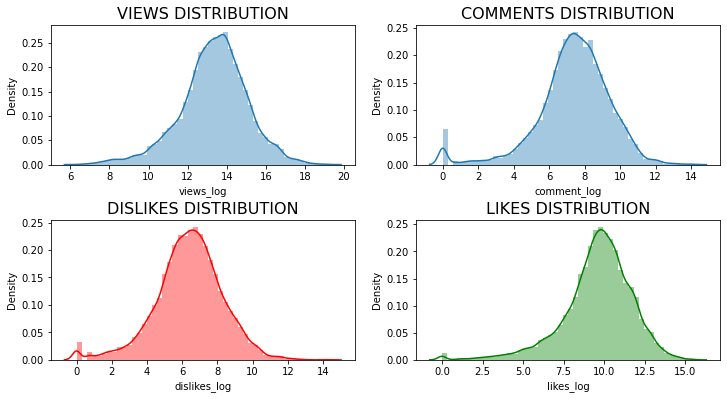

In [19]:
# Fixing skewness
df['likes_log'] = np.log(df['likes'] + 1)
df['views_log'] = np.log(df['views'] + 1)
df['dislikes_log'] = np.log(df['dislikes'] + 1)
df['comment_log'] = np.log(df['comment_count'] + 1)

# Views, Comments, Likes and Dislikes Visulization
plt.figure(figsize = (12,6))

plt.subplot(221)
g1 = sns.distplot(df['views_log'])
g1.set_title("VIEWS DISTRIBUTION", fontsize=16)

plt.subplot(224)
g2 = sns.distplot(df['likes_log'],color='green')
g2.set_title('LIKES DISTRIBUTION', fontsize=16)

plt.subplot(223)
g3 = sns.distplot(df['dislikes_log'], color='r')
g3.set_title("DISLIKES DISTRIBUTION", fontsize=16)

plt.subplot(222)
g4 = sns.distplot(df['comment_log'])
g4.set_title("COMMENTS DISTRIBUTION", fontsize=16)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)
plt.savefig("firstvisual.png" , bbox_inches="tight")
plt.show()

Karena kita ingin menganalisa faktor apa saja yang mungkin mempengaruhi sebuah content menjadi populer, seperti yang bisa dilihat dari visualisasi diatas, bagaimana distribusi data dari kolom views, comments count, likes, dan dislikes.

Berikut ini tim analisis kami akan membuat perhitungan fitur baru ***days_before_trend***, fitur ini akan merepresentasikan waktu antara video pada saat di publish hingga menjadi populer dari dataset yang sudah diberikan.

In [20]:
df["days_before_trend"] = (df.trending_date - df.publish_date) / np.timedelta64(1, 'D')
df["days_before_trend"] = df["days_before_trend"].astype(int)
df.tail(3)

,trending_date,title,channel_title,category_id,category_name,publish_time,publish_date,publish_hour,views,likes,...,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,likes_log,views_log,dislikes_log,comment_log,days_before_trend
40946,2018-06-14,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,Entertainment,17:34:22,2018-05-18,17,1066451,48068,...,3992,False,False,False,I had so much fun transforming Safiyas hair in...,10.780393,13.879848,6.940222,8.292298,27
40947,2018-06-14,How Black Panther Should Have Ended,How It Should Have Ended,1,Film & Animation,17:00:04,2018-05-17,17,5660813,192957,...,13088,False,False,False,How Black Panther Should Have EndedWatch More ...,12.170228,15.549078,7.954021,9.479527,28
40948,2018-06-14,Official Call of Duty®: Black Ops 4 — Multipla...,Call of Duty,20,Gaming,17:09:38,2018-05-17,17,10306119,357079,...,144795,False,False,False,Call of Duty: Black Ops 4 Multiplayer raises t...,12.785715,16.148248,12.268939,11.883081,28


kita juga akan membuat tambahan fitur baru pada data ini dengan menambahkan fitur ***views_per_day***, fitur ini merepresentasikan views video tersebut per hari nya.

In [21]:
df.loc[(df['days_before_trend'] < 1), 'days_before_trend'] = 1
df["views_per_day"] = df["views"].astype(int) / df["days_before_trend"]
df["views_per_day"] = df["views_per_day"]
df.tail(3)

,trending_date,title,channel_title,category_id,category_name,publish_time,publish_date,publish_hour,views,likes,...,comments_disabled,ratings_disabled,video_error_or_removed,description,likes_log,views_log,dislikes_log,comment_log,days_before_trend,views_per_day
40946,2018-06-14,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,Entertainment,17:34:22,2018-05-18,17,1066451,48068,...,False,False,False,I had so much fun transforming Safiyas hair in...,10.780393,13.879848,6.940222,8.292298,27,39498.185185
40947,2018-06-14,How Black Panther Should Have Ended,How It Should Have Ended,1,Film & Animation,17:00:04,2018-05-17,17,5660813,192957,...,False,False,False,How Black Panther Should Have EndedWatch More ...,12.170228,15.549078,7.954021,9.479527,28,202171.892857
40948,2018-06-14,Official Call of Duty®: Black Ops 4 — Multipla...,Call of Duty,20,Gaming,17:09:38,2018-05-17,17,10306119,357079,...,False,False,False,Call of Duty: Black Ops 4 Multiplayer raises t...,12.785715,16.148248,12.268939,11.883081,28,368075.678571


**CEK WAKTU YANG TEPAT UNTUK PUBLISH VIDEO**

Berikut tim analisis kami ingin melihat waktu yg tepat untuk melakukan publish video berdasarkan dengan perhitungan trending video

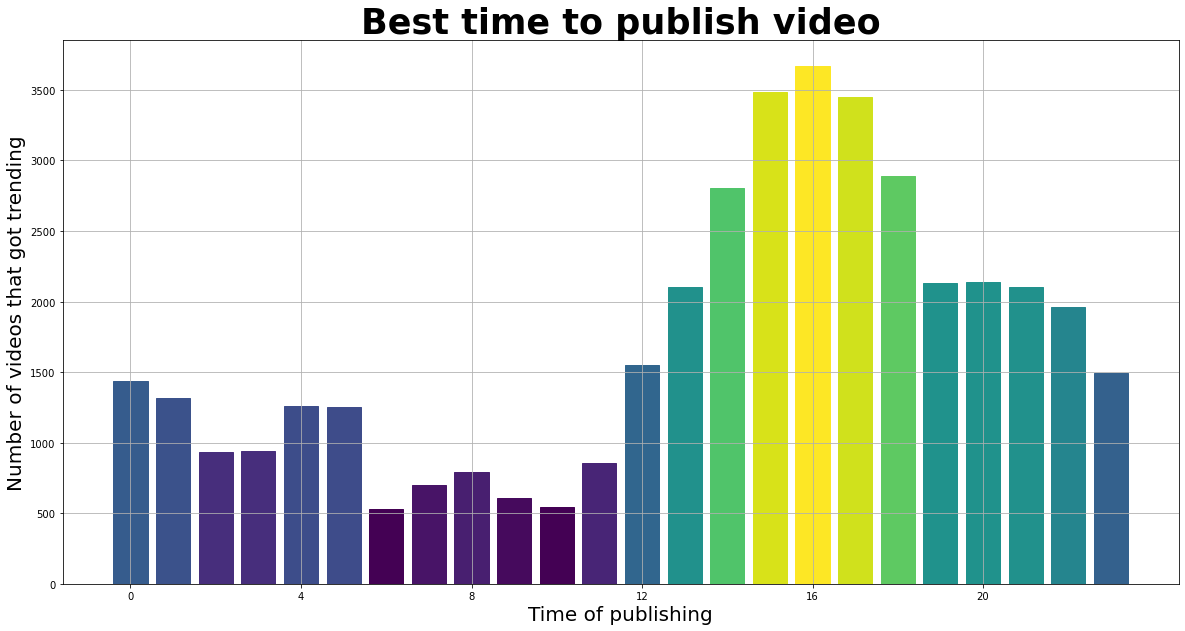

In [22]:
# Initialization of the list storing counters for subsequent publication hours
publish_h = [0] * 24

for index, row in df.iterrows():
    publish_h[row["publish_hour"]] += 1
    
values = publish_h
ind = np.arange(len(values))


# Creating new plot
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.yaxis.grid()
ax.xaxis.grid()
bars = ax.bar(ind, values)

# Sampling of Colormap
for i, b in enumerate(bars):
    b.set_color(plt.cm.viridis((values[i] - min(values))/(max(values)- min(values))))
    
plt.ylabel('Number of videos that got trending', fontsize=20)
plt.xlabel('Time of publishing', fontsize=20)
plt.title('Best time to publish video', fontsize=35, fontweight='bold')
plt.xticks(np.arange(0, len(ind), len(ind)/6), [0, 4, 8, 12, 16, 20])

plt.show()

Seperti yang terlihat dari visualisasi yang kita berikan, untuk faktor yang dapat membuat sebuah konten video menjadi populer adalah pada saat publish video dengan waktu yang tepat.

Bisa kita lihat barplot diatas membandingankan antara waktu publish dengan banyaknya video yang mendapatkan trending, dan pada saat jam 16.00 banyaknya video yang trending. Maka tim analisis kami menyarankan jika ingin melakukan publish video, disarankan pada jam 16.00

**CEK BANYAKNYA VIDEO BERDASARKAN NAMA KATEGORINYA**

Disini kita akan melihat banyaknya video yang di publish berdasarkan dari nama kategorinya, karena faktor yang mungkin mempengaruhi content video akan menjadi populer berdasarkan kategori video yg dibuat.

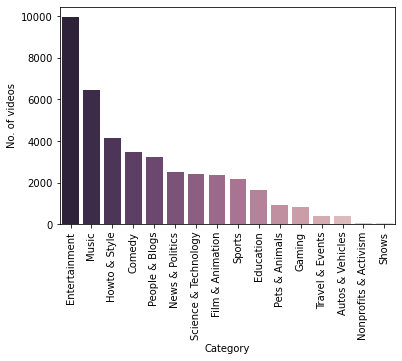

In [23]:
# Visualisasi untuk melihat banyaknya video dari kolom category_name

cdf = df["category_name"].value_counts().to_frame().reset_index()
cdf.rename(columns={"index": "category_name", "category_name": "No_of_videos"}, inplace=True)
fig, ax = plt.subplots()
_ = sns.barplot(x="category_name", y="No_of_videos", data=cdf, 
                palette=sns.cubehelix_palette(n_colors=16, reverse=True), ax=ax)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="Category", ylabel="No. of videos")

Seperti yang terlihat di barplot ini adalah untuk melihat banyaknya video berdasarkan dari nama kategori. 5 teratas dengan banyaknya video yang di publish adalah :
1. Entertainment
2. Music
3. Howto & style
4. Comedy
5. People & Blogs

Kita dapat memberikan insight bahwa video terpopuler berdasarkan kategori adalah _Entertainment_ , jadi kita tim analis dapat menyarankan untuk content creator dapat membuat content dengan kategori entertainment, dan terpopuler berdasarkan kategorinya ada Music, Howto & Style, Comedy, dan People & Blogs. Maka ada faktor video bisa menjadi populer karena content kategori yang dibuat. 

**CEK BANYAKNYA VIDEO YANG TRENDING BERDASARKAN DARI NAMA CHANNELS**

Tim analisis kami ingin melihat banyak nya video yang populer berdasarkan nama channel yang sudah ada di US.

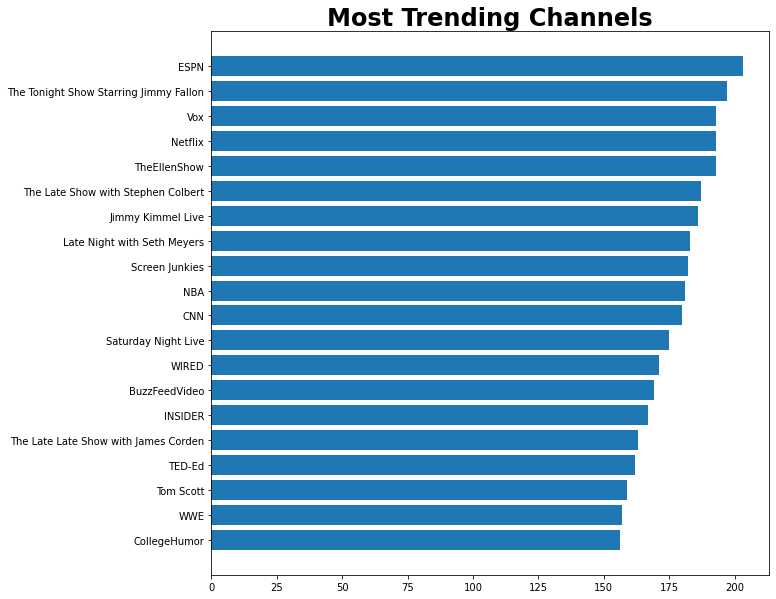

In [24]:
fig = plt.figure(figsize=(10,10))

ch_names = df.groupby("channel_title")["category_id"].count().sort_values(ascending=False).index[:20]
cnts = df.groupby("channel_title")["category_id"].count().sort_values(ascending=False).values[:20]

plt.barh(ch_names[::-1] , cnts[::-1])
plt.title("Most Trending Channels" , fontsize=24 , fontweight="bold")

plt.savefig("trending_channels.png" , bbox_inches="tight")
plt.show()

Bisa kita lihat disini adalah channel youtube dengan paling banyaknya trending atau populer, kita bisa melihat bahwa memang entertainment, sport, dan music masih menjadi paling dicari oleh orang-orang. 

**CEK RATA-RATA HARI HINGGA VIDEO TERSEBUT MENJADI TRENDING**

Tim analisis kita ingin melihat jarak rentang waktu antara video pertama kali dipublish hingga video tersebut menjadi trending berdasarkan nama kategori nya.

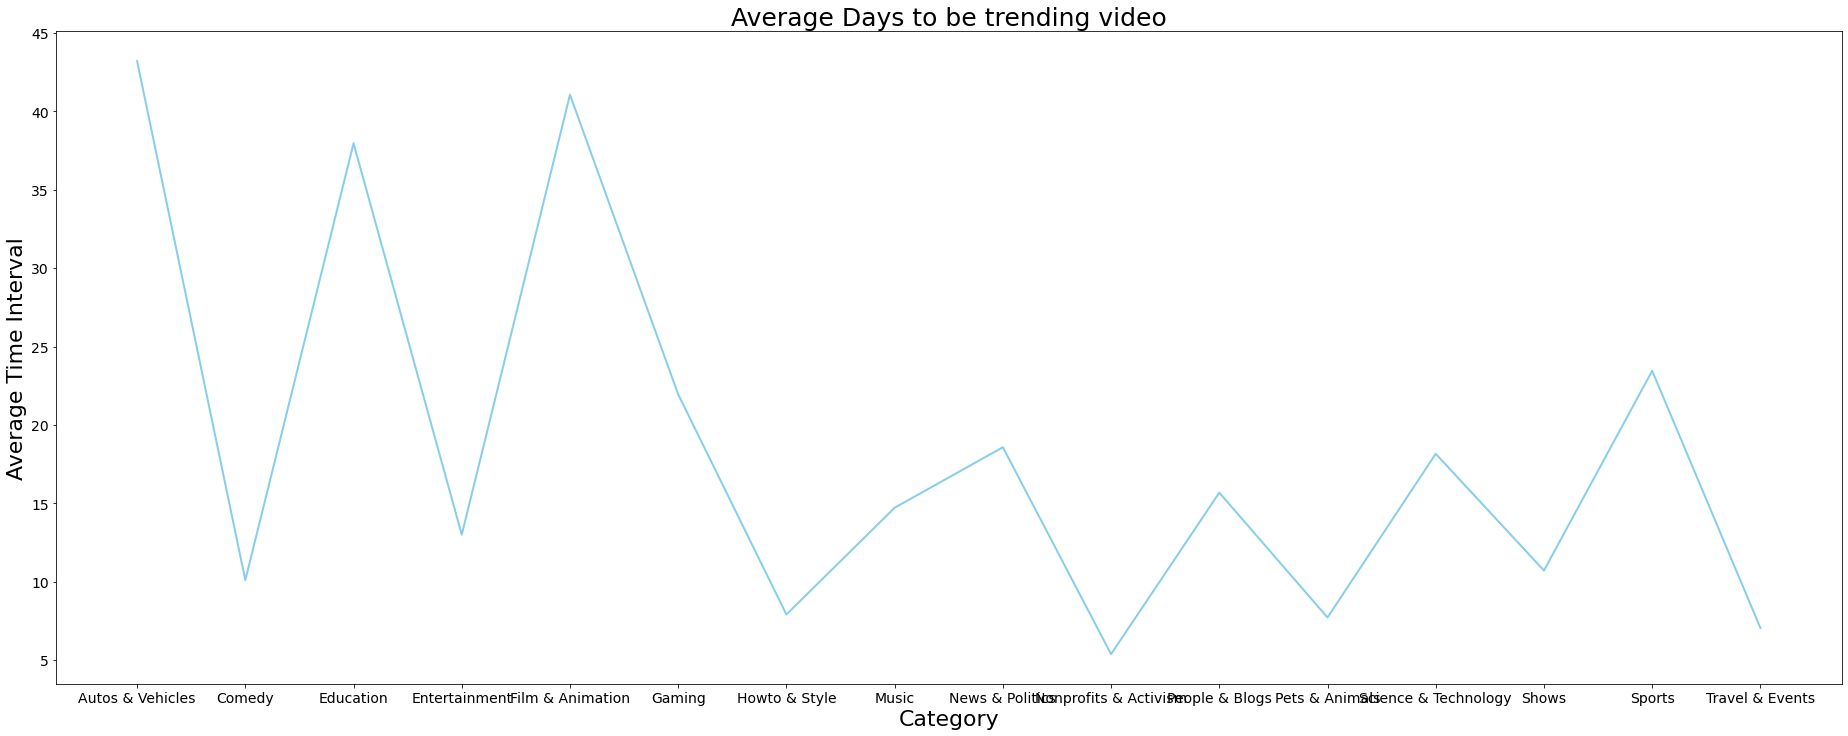

In [25]:
# Average time interval between published and trending
df['interval'] = (pd.to_datetime(df['trending_date']).dt.date - pd.to_datetime(df['publish_date']).dt.date).astype('timedelta64[D]')
df_t = pd.DataFrame(df['interval'].groupby(df['category_name']).mean())
plt.figure(figsize = (32,12))
plt.plot(df_t, color='skyblue', linewidth=2)
plt.title("Average Days to be trending video", fontsize=25)
plt.xlabel('Category',fontsize=22)
plt.ylabel('Average Time Interval',fontsize=22)
plt.tick_params(labelsize=14)
plt.show()

Disini kita dapat melihat hasil dari jarak rentang rata-rata video yang menjadi trending dari video tersebut dipublish pertama kali. Bisa dilihat dari lineplot tersebut bisa disimpulkan bahwa untuk kategori "non-profits & activity" menjadi yang tercepat dalam mendapatkan trending setelah melakukan publish video pertama kali, tetapi untuk banyaknya video yang trending dengan kategori tersebut tidak banyak.

**CEK VIDEO DENGAN LIKES, DISLIKES, DAN COMMENT TERBANYAK DILIHAT DARI RATIO**

Tim analisis kami ingin melihat distribusi like, dislikes, dan comment dari video

In [27]:
df['like_rate'] =  df ['likes'] / df['views'] * 100
df['dislike_rate'] =  df ['dislikes'] / df['views'] * 100
df['comment_rate'] =  df ['comment_count'] / df['views'] * 100

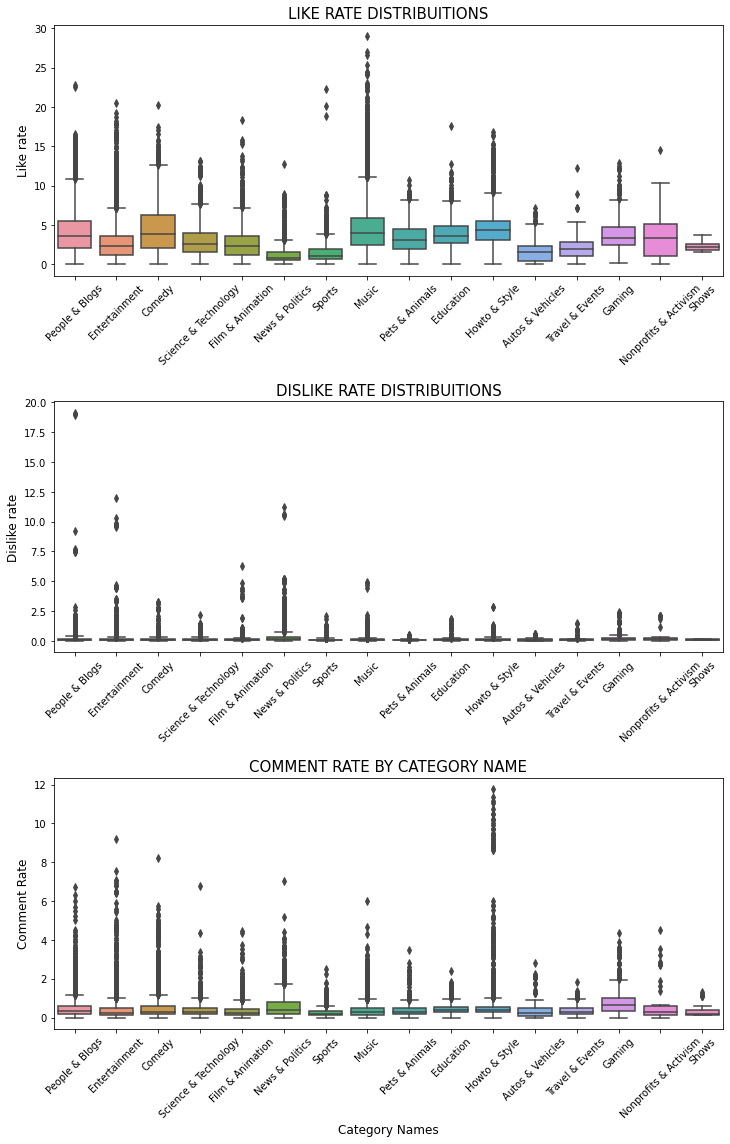

In [28]:
plt.figure(figsize = (12,18))

plt.subplot(311)
g= sns.boxplot(x='category_name',y='like_rate',  data=df)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("LIKE RATE DISTRIBUITIONS", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Like rate", fontsize=12)

plt.subplot(312)
g1= sns.boxplot(y='dislike_rate', x='category_name', data=df)
g1.set_xticklabels(g.get_xticklabels(),rotation=45)
g1.set_title("DISLIKE RATE DISTRIBUITIONS", fontsize=15)
g1.set_xlabel("", fontsize=12)
g1.set_ylabel("Dislike rate", fontsize=12)

plt.subplot(313)
g2= sns.boxplot(y='comment_rate', x='category_name', data=df)
g2.set_xticklabels(g.get_xticklabels(),rotation=45)
g2.set_title("COMMENT RATE BY CATEGORY NAME", fontsize=15)
g2.set_xlabel("Category Names", fontsize=12)
g2.set_ylabel("Comment Rate", fontsize=12)

plt.subplots_adjust(wspace = 0.2, hspace = 0.5,top = 0.9)

plt.show()

Tim analisis kami mendapatkan hasil bahwa tingkat dislikes berdasarkan nama katergori sangatlah rendah, tetapi di beberapa kategori seperti "peoples and blogs" dan "news & politics" ada outliersnya dan kita masih bisa menyimpulkan masih normal. 

Rata-rata distribusi like kurang dari 5% tapi dalam kategori music memiliki tingkat pola yang tinggi dalam mendapatkan likes yang disini cukup menarik

Dan pada kolom comment rata-rata distribusi nya tertinggi di kategori howto & style, karena mungkin banyak yang ingin bertanya lewat kolom komentar.

**KORELASI STATISTIK**

In [ ]:
df.corr(method='pearson')

,category_id,publish_hour,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,dislike_percentage,likes_log,views_log,dislikes_log,comment_log,days_before_trend,views_per_day,interval
category_id,1.000000,0.077981,-0.168231,-0.173921,-0.033547,-0.076307,0.048949,-0.013506,-0.030011,0.082000,-0.144521,-0.172070,-0.105567,-0.107575,-0.028633,-0.142019,-0.028632
publish_hour,0.077981,1.000000,-0.064916,-0.045296,-0.009750,-0.017421,-0.012056,0.010757,0.002465,-0.042781,0.040554,-0.012268,0.018998,0.050659,0.003809,-0.087313,0.003845
views,-0.168231,-0.064916,1.000000,0.849177,0.472213,0.617621,0.002677,0.015355,-0.002256,-0.026428,0.387948,0.494099,0.431819,0.362787,-0.014432,0.688480,-0.014427
likes,-0.173921,-0.045296,0.849177,1.000000,0.447186,0.803057,-0.028918,-0.020888,-0.002641,-0.080572,0.456682,0.466928,0.438127,0.434318,-0.017655,0.715773,-0.017650
dislikes,-0.033547,-0.009750,0.472213,0.447186,1.000000,0.700184,-0.004431,-0.008230,-0.001853,0.127597,0.176128,0.206148,0.263181,0.199166,-0.007058,0.450053,-0.007056
comment_count,-0.076307,-0.017421,0.617621,0.803057,0.700184,1.000000,-0.028277,-0.013819,-0.003725,0.011547,0.313172,0.319630,0.338751,0.357253,-0.013258,0.609873,-0.013254
comments_disabled,0.048949,-0.012056,0.002677,-0.028918,-0.004431,-0.028277,1.000000,0.319230,-0.002970,0.112628,-0.152176,-0.021518,-0.071231,-0.450011,-0.002149,0.021738,-0.002157
ratings_disabled,-0.013506,0.010757,0.015355,-0.020888,-0.008230,-0.013819,0.319230,1.000000,-0.001526,NaN,-0.292085,-0.021254,-0.214666,-0.165460,0.003202,0.033876,0.003201
video_error_or_removed,-0.030011,0.002465,-0.002256,-0.002641,-0.001853,-0.003725,-0.002970,-0.001526,1.000000,0.004695,-0.001422,-0.002007,-0.000226,-0.013419,-0.001057,-0.003244,-0.001056
dislike_percentage,0.082000,-0.042781,-0.026428,-0.080572,0.127597,0.011547,0.112628,NaN,0.004695,1.000000,-0.356245,-0.155393,0.139316,-0.142578,0.018798,-0.022884,0.018792


<AxesSubplot:xlabel='views', ylabel='comment_count'>

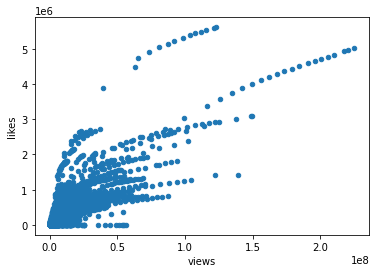

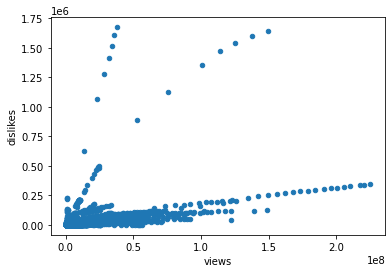

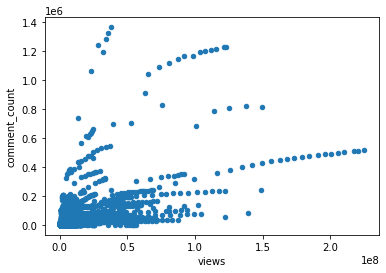

In [ ]:
df.plot.scatter(x='views', y='likes')
df.plot.scatter(x='views', y='dislikes')
df.plot.scatter(x='views', y='comment_count')

Kita dapat melihat kolom views dan like sangat berkorelasi, Meningkatnya angka views berkorelasi dengan meningkatnya angka likes. Dari sini kita dapat menginformasikan jika untuk meningkatkan likes maka bisa dengan banyaknya views.

<AxesSubplot:xlabel='category_id', ylabel='dislikes'>

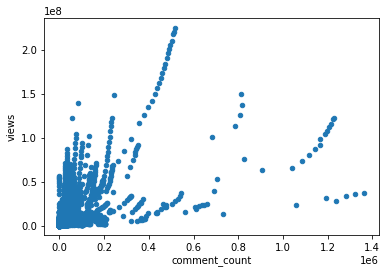

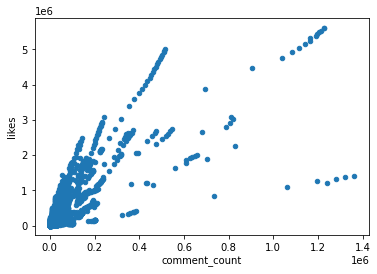

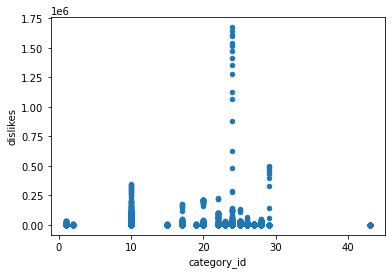

In [ ]:
df.plot.scatter(x='comment_count', y='views')
df.plot.scatter(x='comment_count', y='likes')
df.plot.scatter(x='category_id', y='dislikes')

Korelasi antara category dengan banyaknya dislikes kurang berkorelasi. Karena beberapa kategori video mendapatkan views, ratings lebih signifikan dibanding oleh banyaknya dislikes.

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40949 entries, 0 to 40948
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   trending_date           40949 non-null  object 
 1   title                   40949 non-null  object 
 2   channel_title           40949 non-null  object 
 3   category_id             40949 non-null  int64  
 4   category_name           40949 non-null  object 
 5   publish_time            40949 non-null  object 
 6   publish_date            40949 non-null  object 
 7   publish_hour            40949 non-null  int64  
 8   views                   40949 non-null  int64  
 9   likes                   40949 non-null  int64  
 10  dislikes                40949 non-null  int64  
 11  comment_count           40949 non-null  int64  
 12  comments_disabled       40949 non-null  bool   
 13  ratings_disabled        40949 non-null  bool   
 14  video_error_or_removed  40949 non-null

# KESIMPULAN DAN REKOMENDASI

**KESIMPULAN**

Dari analisis yang telah dilakukan, kita bisa membuat kesimpulan tentang beberapa faktor yang bisa membuat para content creator dapat mendapatkan video trending :

- Dari 40949 data yang kita dapatkan dari beberapa video yang sudah dipublish kita dapat mengkategorikan semua video tersebut berdasarkan kategori nama nya dan dapat mendapatkan asumsi dari kategori video tersebut.
- Untuk waktu yang tepat melakukan publish video hingga bisa mendapatkan trending adalah pada jam 15.00 - 17.00, bisa dilihat dari data yang kita sudah rangkumkan bahwa sekitar jam 15.00-17.00 banyak video yang bisa mendapatkan trending pada saat publish video di jam tersebut.
- Faktor berikutnya video bisa mendapatkan trending adalah menyesuaikan dengan nama kategori yang paling banyak trending, kita bisa lihat di rangkuman visualisasi diatas bahwa kategori 'Entertainment', 'Music', 'Howto&style', 'People&Blogs', dan 'Comedy' bisa mendapatkan trending video dengan kategory tersebut.



**REKOMENDASI**

Dengan hasil analisis ini kita dapat memberikan rekomendasi terhadap content creator yang ingin videonya bisa trending, berikut hasil rekomendasi dari tim analisis kami :

1. Waktu yang tepat untuk melakukan publish video sekitar jam 15.00 - 17.00, karena banyaknya video yang trending pada saat publish dijam tersebut.
2. Membuat content video berdasarkan dari nama kategori nya, karena banyaknya video yang trending dari beberapa kategori, kita bisa memberikan rekomendasi untuk membuat video berdasarkan kategori tersebut.
3. Views, likes, dan Comment bisa menjadi faktor juga terhadap video yang trending, disini kita bisa menyarankan bahwa setipa content creator mungkin bisa mengajak para penonton video tersebut untuk melakukan likes video dan comment terhadap video tersebut.
4. Banyaknya dislikes ternyata tidak terlalu berpengaruh terhadap video tersebut menjadi trending atau tidak.
5. Ternyata kolom description tidak terlalu berpengaruh terhadap video tersebut menjadi trending atau tidak.

Dengan melihat hasil rangkuman analisis berdasarkan waktu, kategori, banyaknya views, likes, dislikes, dan comment, diharapkan tim analisis kami bisa memberikan insight yang bermanfaat untuk menjadikan strategi buat para content creator untuk mendapatkan video trending ataupun meningkatnya views dan likes terhadap video tersebut.


**TERIMA KASIH**

MUHAMMAD VAREZA MIRZA "JCDS" PURWADHIKA DIGITAL SCHOOL, CAPSTONE PROJECT MODUL 2